In [1]:
!pip install gensim
!pip install nltk


import pandas as pd
import requests
from io import StringIO
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import string




In [2]:
# import book
url = 'https://www.gutenberg.org/cache/epub/26209/pg26209.txt'

# Download the file content
response = requests.get(url)
content = response.text

# Read the TSV content into a DataFrame
df = pd.read_csv(StringIO(content), delimiter='\t')

# Display the DataFrame
df

,The Project Gutenberg eBook of The Golden Age Cook Book
0,This ebook is for the use of anyone anywhere i...
1,most other parts of the world at no cost and w...
2,"whatsoever. You may copy it, give it away or r..."
3,of the Project Gutenberg License included with...
4,at www.gutenberg.org. If you are not located i...
...,...
5052,facility: www.gutenberg.org.
5053,This website includes information about Projec...
5054,including how to make donations to the Project...
5055,"Archive Foundation, how to help produce our ne..."


In [3]:
# rename column
df.rename(columns={'The Project Gutenberg eBook of The Golden Age Cook Book': 'text_column'}, inplace=True)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,text_column
0,This ebook is for the use of anyone anywhere i...
1,most other parts of the world at no cost and w...
2,"whatsoever. You may copy it, give it away or r..."
3,of the Project Gutenberg License included with...
4,at www.gutenberg.org. If you are not located i...


In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
df['text_column'] = df['text_column'].astype(str)

In [8]:
# Tokenization and lowercase
df['tokens'] = df['text_column'].apply(lambda x: word_tokenize(x.lower()))

# Remove punctuation and numbers
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha()])
df

,text_column,tokens
0,This ebook is for the use of anyone anywhere i...,"[this, ebook, is, for, the, use, of, anyone, a..."
1,most other parts of the world at no cost and w...,"[most, other, parts, of, the, world, at, no, c..."
2,"whatsoever. You may copy it, give it away or r...","[whatsoever, you, may, copy, it, give, it, awa..."
3,of the Project Gutenberg License included with...,"[of, the, project, gutenberg, license, include..."
4,at www.gutenberg.org. If you are not located i...,"[at, if, you, are, not, located, in, the, unit..."
...,...,...
5052,facility: www.gutenberg.org.,[facility]
5053,This website includes information about Projec...,"[this, website, includes, information, about, ..."
5054,including how to make donations to the Project...,"[including, how, to, make, donations, to, the,..."
5055,"Archive Foundation, how to help produce our ne...","[archive, foundation, how, to, help, produce, ..."


In [9]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [11]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [12]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [14]:
df

,text_column,tokens
0,This ebook is for the use of anyone anywhere i...,"[ebook, use, anyone, anywhere, united, state]"
1,most other parts of the world at no cost and w...,"[part, world, cost, almost, restriction]"
2,"whatsoever. You may copy it, give it away or r...","[whatsoever, may, copy, give, away, term]"
3,of the Project Gutenberg License included with...,"[project, gutenberg, license, included, ebook,..."
4,at www.gutenberg.org. If you are not located i...,"[located, united, state]"
...,...,...
5052,facility: www.gutenberg.org.,[facility]
5053,This website includes information about Projec...,"[website, includes, information, project]"
5054,including how to make donations to the Project...,"[including, make, donation, project, gutenberg..."
5055,"Archive Foundation, how to help produce our ne...","[archive, foundation, help, produce, new, ebooks]"


In [15]:
# Create a dictionary
dictionary = corpora.Dictionary(df['tokens'])

# Create a bag of words representation
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]


In [16]:
# LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)


In [18]:
# Print topics
# choice num_words = 5
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.060*"water" + 0.030*"cook" + 0.022*"thick" + 0.021*"tender" + 0.021*"rice"')
(1, '0.061*"cup" + 0.058*"half" + 0.053*"one" + 0.049*"flour" + 0.045*"sugar"')
(2, '0.045*"boil" + 0.044*"fire" + 0.036*"put" + 0.036*"cold" + 0.032*"let"')
(3, '0.048*"salt" + 0.047*"pepper" + 0.028*"taste" + 0.026*"juice" + 0.024*"onion"')
(4, '0.058*"tomato" + 0.044*"work" + 0.031*"electronic" + 0.020*"mushroom" + 0.020*"stuffed"')
(5, '0.056*"tablespoonful" + 0.054*"butter" + 0.037*"cheese" + 0.031*"heaping" + 0.026*"apple"')
(6, '0.071*"project" + 0.033*"work" + 0.024*"gutenberg" + 0.020*"state" + 0.018*"almond"')
(7, '0.101*"egg" + 0.045*"bread" + 0.035*"white" + 0.033*"beat" + 0.027*"yolk"')
(8, '0.090*"sauce" + 0.064*"serve" + 0.063*"cream" + 0.030*"may" + 0.019*"sandwich"')
(9, '0.049*"bake" + 0.035*"oven" + 0.028*"minute" + 0.025*"hour" + 0.023*"brown"')


In [19]:
# Print topics
# choice num_words = 40
topics = lda_model.print_topics(num_words=40)
for topic in topics:
    print(topic)


(0, '0.060*"water" + 0.030*"cook" + 0.022*"thick" + 0.021*"tender" + 0.021*"rice" + 0.021*"ice" + 0.018*"boiling" + 0.018*"fruit" + 0.018*"mould" + 0.017*"use" + 0.017*"cut" + 0.014*"cover" + 0.013*"little" + 0.013*"jelly" + 0.012*"boiled" + 0.012*"recipe" + 0.010*"half" + 0.010*"put" + 0.010*"fresh" + 0.010*"extract" + 0.009*"done" + 0.009*"custard" + 0.009*"full" + 0.009*"add" + 0.009*"turn" + 0.009*"hour" + 0.009*"drain" + 0.009*"using" + 0.008*"mixture" + 0.008*"inch" + 0.008*"cooked" + 0.007*"spinach" + 0.007*"spaghettina" + 0.007*"part" + 0.007*"spread" + 0.007*"take" + 0.006*"set" + 0.006*"plain" + 0.006*"pudding" + 0.006*"gently"')
(1, '0.061*"cup" + 0.058*"half" + 0.053*"one" + 0.049*"flour" + 0.045*"sugar" + 0.037*"milk" + 0.035*"pound" + 0.035*"two" + 0.029*"teaspoonful" + 0.027*"butter" + 0.025*"add" + 0.025*"ounce" + 0.024*"tablespoonful" + 0.023*"pint" + 0.021*"cream" + 0.016*"pudding" + 0.014*"stir" + 0.013*"water" + 0.011*"cake" + 0.011*"granulated" + 0.011*"heaping" + 

In [20]:
!pip install --upgrade matplotlib wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

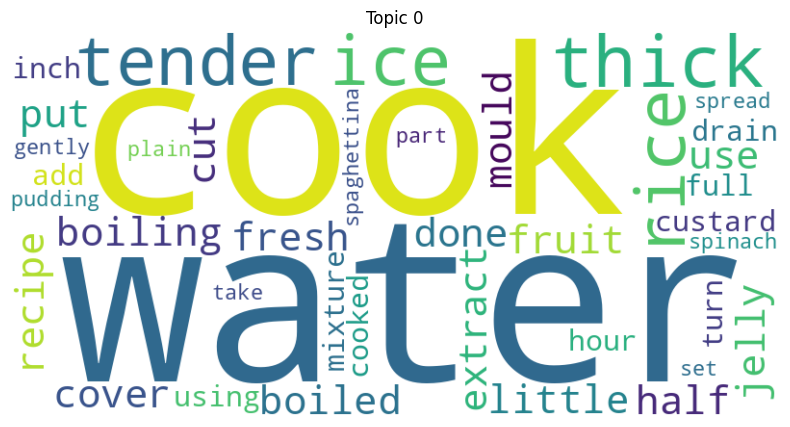

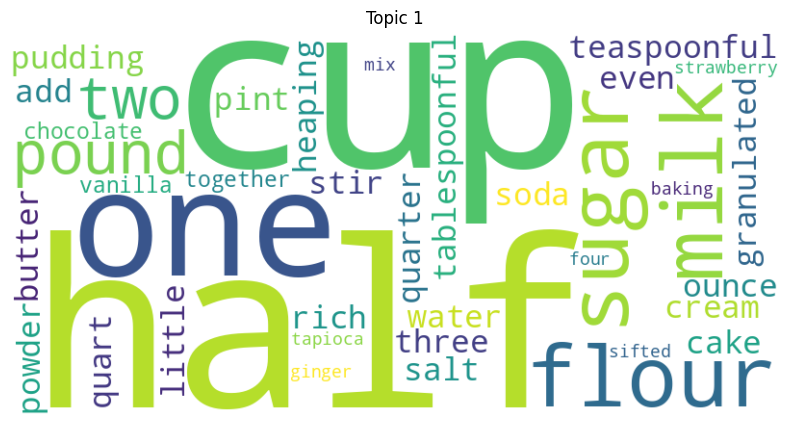

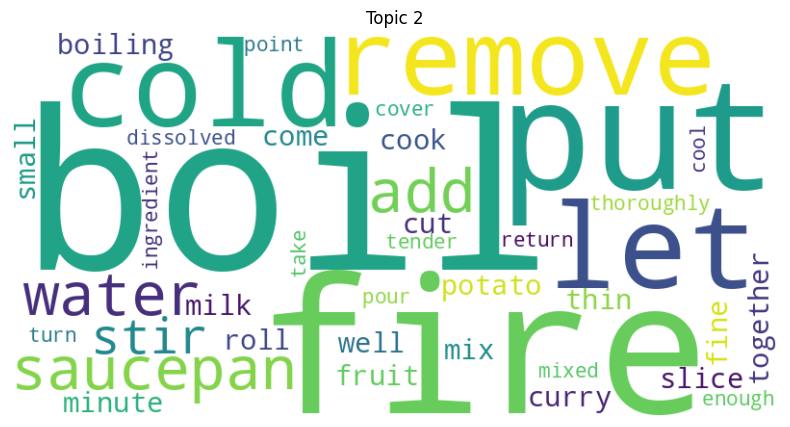

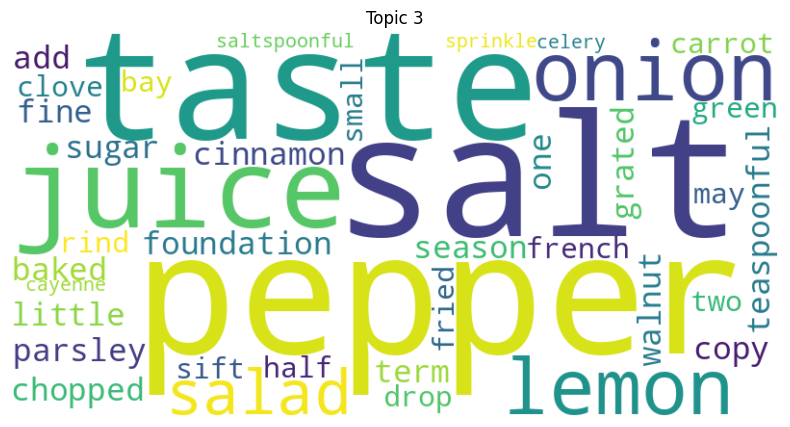

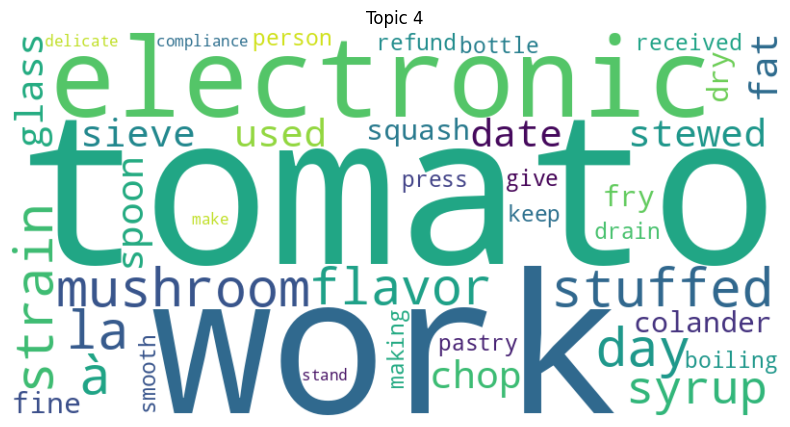

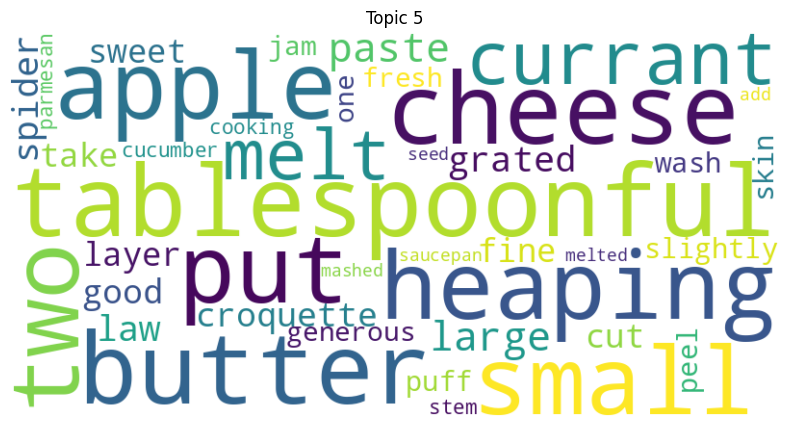

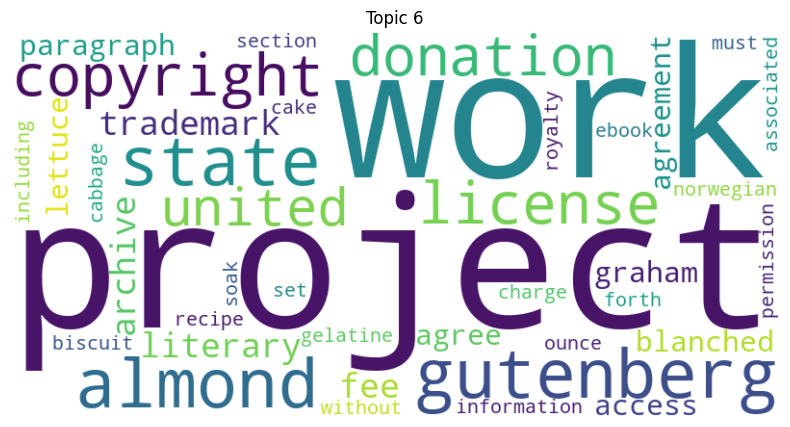

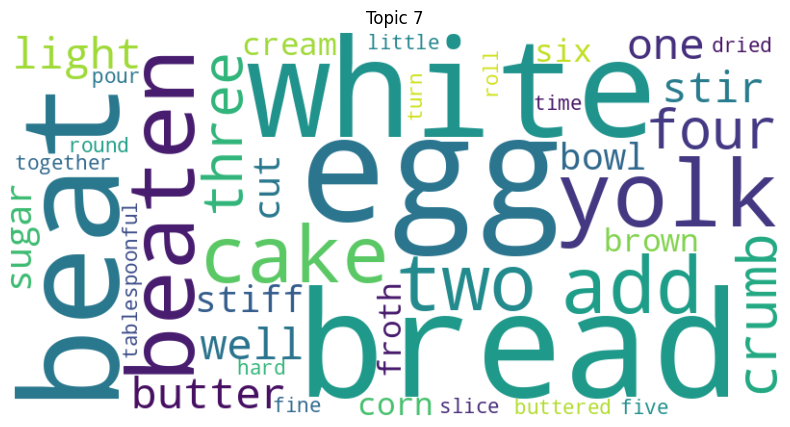

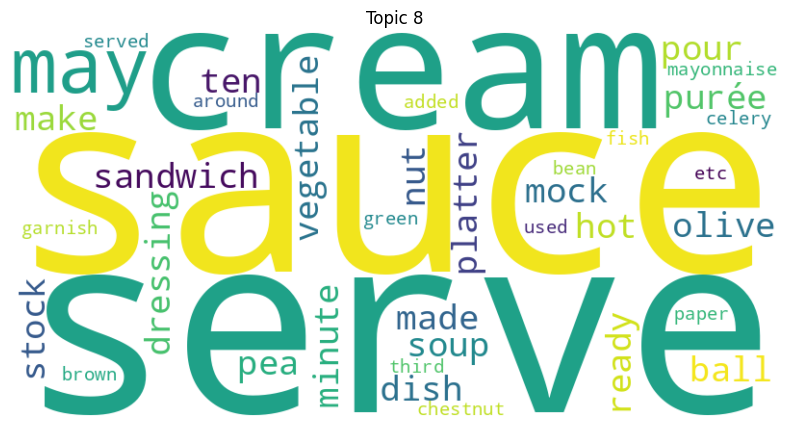

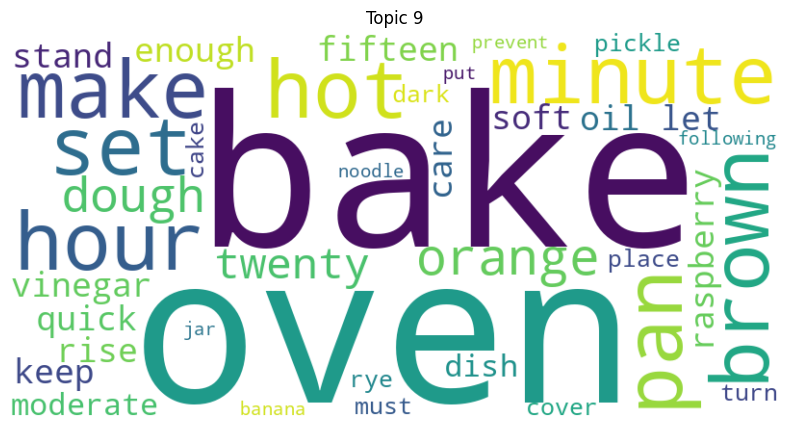

In [22]:
for topic in topics:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic[1])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic[0]}')
    plt.show()